In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns
import time

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/SachinScaler/May25_Intro_to_ML_NN/refs/heads/main/cars24-car-price.csv')

In [3]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


#### Here We assume the selling_price(y) is depending on max_power(x). And here we using simple linear regression
#### Here we get 2 continuous variable so we build a scatter plot


x::: [ 46.3   82.    80.   ... 103.52 140.   117.6 ]
y::: [ 1.2   5.5   2.15 ...  4.25 12.25 12.  ]


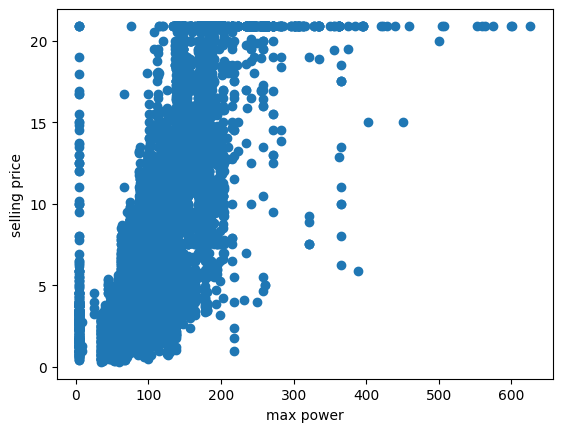

In [4]:
x = df['max_power'].values
y = df['selling_price'].values

print("x:::", x)
print("y:::", y)

# normalization - u = x.mean(); std = x.std(); X= (x-u)/std
# here i want to plot selling price 0 - 200


plt.scatter(x, y)
plt.xlabel("max power")
plt.ylabel("selling price")
plt.show()

In [5]:
# Here we are going to implement univariate linear regression from scratch
# we predict selling price based on max power
# y = theta0 + theta1*x
def univariate_linear_hypothesis(x, theta):
    y_hat = theta[0] + theta[1] * x
    return y_hat


In [6]:
# Cost function to calculate mean squared error
# MSE = 1/m * sum((y_ - y)^2)
# y_ means predicted value
def cost_function(x, y, theta):
    m = x.shape[0]
    total_cost = 0.0
    for i in range(m):
        y_ = univariate_linear_hypothesis(x[i], theta)
        total_cost += (y_ - y[i]) ** 2
    return total_cost /  m

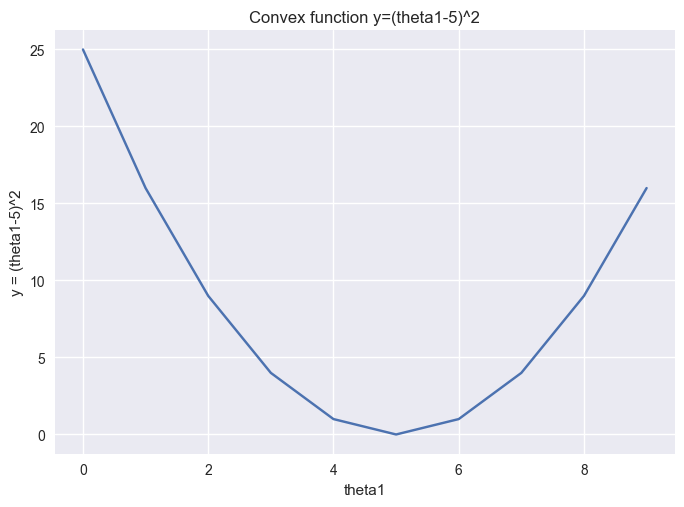

In [7]:
# By this plot we are going to see how gredient descent is working
# convex function meanning it has only one minima
# y = (x-5)^2 ---> minima at x=5
X = np.arange(10)
Y = (X-5)**2
plt.style.use('seaborn-v0_8')
plt.plot(X, Y)
plt.xlabel("theta1")
plt.ylabel("y = (theta1-5)^2")
plt.title("Convex function y=(theta1-5)^2")
plt.show()



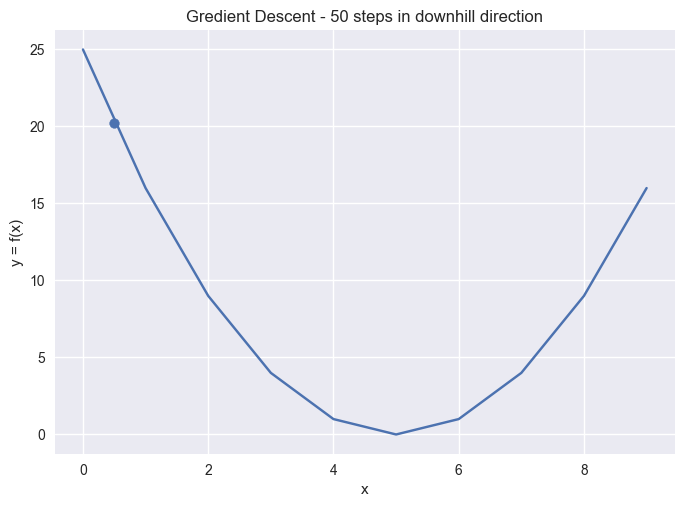

In [8]:
x = 0.5
y = (x-5)**2
plt.style.use('seaborn-v0_8')
plt.plot(X, Y)
plt.scatter(x, y)
plt.ylabel("y = f(x)")
plt.xlabel("x")
plt.title("Gredient Descent - 50 steps in downhill direction")
plt.show()


[20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25]


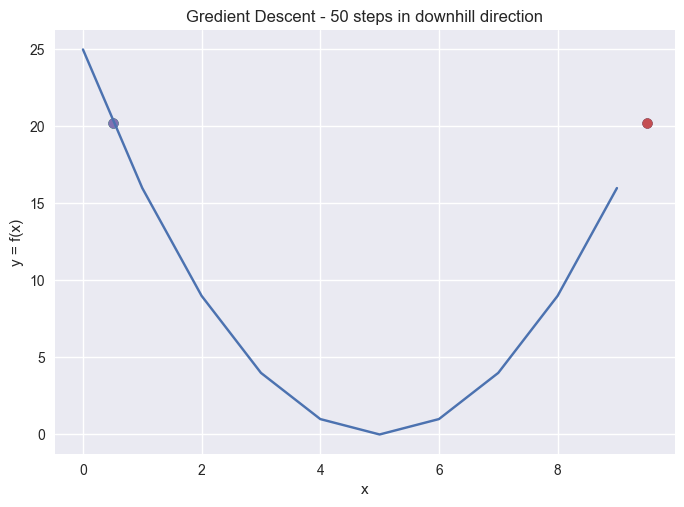

In [9]:
# Here we fix the value of theta0 = 0 and theta1 = 0.5

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

x = 0.5
y = (x-5)**2
plt.style.use('seaborn-v0_8')
plt.plot(X, Y)
# plt.scatter(x, y)
plt.ylabel("y = f(x)")
plt.xlabel("x")
plt.title("Gredient Descent - 50 steps in downhill direction")

# lr -> Learning rate which is notusing
lr = 0.1
errors = []
# 10 steps in downhill direction
for i in range(10):
    gradient = 2*(x - 5)
    # calculating the feedback
    x = x - gradient
    y = (x - 5)**2
    error = y-0
    errors.append(error)
    plt.scatter(x, y)
    fig.canvas.draw()
    time.sleep(1)
print(errors)
plt.show()

# For the function ( y = (x-5)^2 ), the minimum value (the "target" or "true minimum") is 0, which occurs at ( x = 5 ). So, subtracting 0 is just measuring how far your current ( y ) value is from the minimum possible value.


[12.96, 8.2944, 5.308415999999999, 3.39738624, 2.1743271935999995, 1.3915694039039996, 0.8906044184985598, 0.5699868278390782, 0.3647915698170103, 0.2334666046828864, 0.14941862699704703, 0.0956279212781102, 0.06120186961799035, 0.039169196555513826, 0.025068285795528736, 0.016043702909138348, 0.010267969861848542, 0.006571500711583067, 0.004205760455413209, 0.002691686691464472, 0.0017226794825372916, 0.0011025148688238548, 0.0007056095160472766, 0.00045159009027026455, 0.00028901765777296324, 0.00018497130097468683, 0.00011838163262380729, 7.576424487923358e-05, 4.848911672270454e-05, 3.103303470252695e-05, 1.986114220961883e-05, 1.2711131014154785e-05, 8.135123849059063e-06, 5.206479263396178e-06, 3.3321467285735543e-06, 2.1325739062875937e-06, 1.36484730002489e-06, 8.735022720152655e-07, 5.590414540892386e-07, 3.577865306175378e-07, 2.2898337959556417e-07, 1.465493629412971e-07, 9.379159228232132e-08, 6.002661906068564e-08, 3.8417036198908447e-08, 2.4586903167301407e-08, 1.57356180

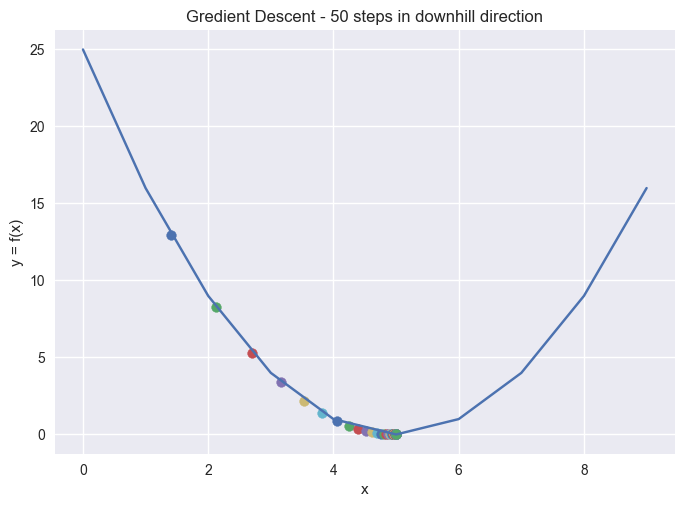

In [10]:
# Here we fix the value of theta0 = 0 and theta1 = 0.5

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

x = 0.5
y = (x-5)**2
plt.style.use('seaborn-v0_8')
plt.plot(X, Y)
# plt.scatter(x, y)
plt.ylabel("y = f(x)")
plt.xlabel("x")
plt.title("Gredient Descent - 50 steps in downhill direction")

# lr -> Learning rate which is notusing
lr = 0.1
errors = []
# 10 steps in downhill direction
for i in range(50):
    gradient = 2*(x - 5)
    # calculating the feedback
    x = x - gradient*lr
    y = (x - 5)**2
    error = y-0
    errors.append(error)
    plt.scatter(x, y)
    fig.canvas.draw()
    time.sleep(1)
print(errors)
plt.show()

# For the function ( y = (x-5)^2 ), the minimum value (the "target" or "true minimum") is 0, which occurs at ( x = 5 ). So, subtracting 0 is just measuring how far your current ( y ) value is from the minimum possible value.


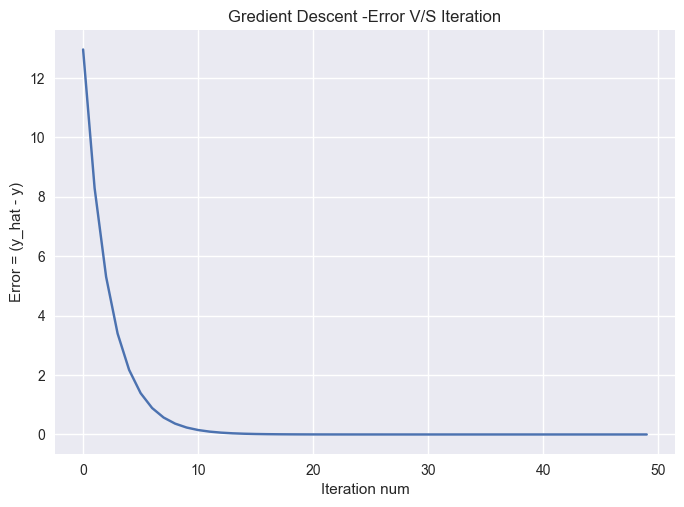

In [11]:
plt.plot(errors)
plt.xlabel("Iteration num")
plt.ylabel("Error = (y_hat - y)")
plt.title("Gredient Descent -Error V/S Iteration")
plt.show()

In [12]:
# Picking the X and Y variable
X = df['max_power'].values
Y = df['selling_price'].values

# Standard normalization 
#  to +3
u = X.mean()
std = X.std()
X = (X-u)/std

In [13]:
# finding the hypothesis
def hypothisis(x, theta):
    y_hat = theta[0] + theta[1]*x
    return y_hat 

In [14]:
# This function is for finding gradient of cost function
# one is for theta0 and another is for theta1

def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_hat = hypothisis(x, theta)
        y = Y[i]
        grad[0] += (y_hat-y)
        grad[1] += (y_hat-y)*x
    return grad/m


In [15]:
# This code is for finding the Mean Squared Error
def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_hat = hypothisis(X[i], theta)
        total_error += (y_hat - Y[i])**2
    return (total_error/m)
    

In [29]:
def gradient_descent(X,Y,max_steps = 100, learning_rate = 0.1):
    theta_list = []
    error_list = []
    theta = np.zeros((2,))
    for i in range(max_steps):
        # compute grad
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)

        # update theta
        theta[0] = theta[0] - grad[0]*learning_rate
        theta[1] = theta[1] - grad[1]*learning_rate
        theta_list.append([theta[0], theta[1]])
        # print("theta1", theta[1], "and theta0", theta[0])
        error_list.append(e)
    return theta, error_list, theta_list

In [30]:
# Running the gradient descent and printing the final value of theta0 and theta1
theta, error_list, theta_list = gradient_descent(X, Y, max_steps=50)
print(theta)

[6.5515683  3.71502065]


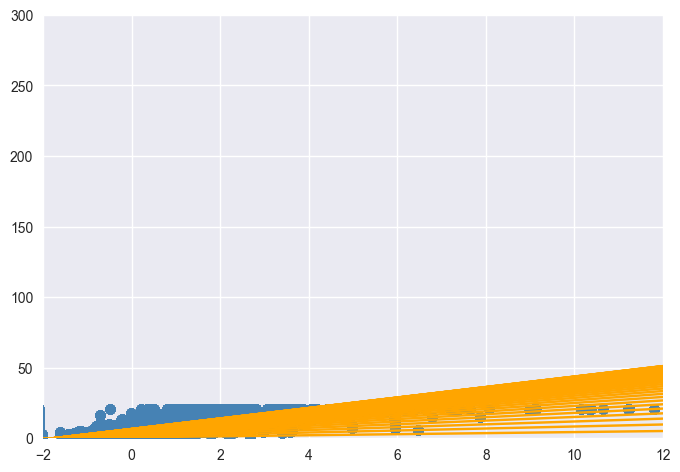

In [18]:
# This code for checking the error reduction or feedback loop

fig= plt.figure()
ax = fig.add_subplot(111)
plt.ion()

for intercept, slope in theta_list:
    # plot a line from slope and intercept
    # ax.clear()
    ax.set_xlim([-2, 12])
    ax.set_ylim([0, 300])
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept+slope*x_vals
    ax.scatter(X,Y,color="steelblue")
    ax.plot(x_vals, y_vals, color="orange")
    fig.canvas.draw()
    time.sleep(0.5)

plt.show()

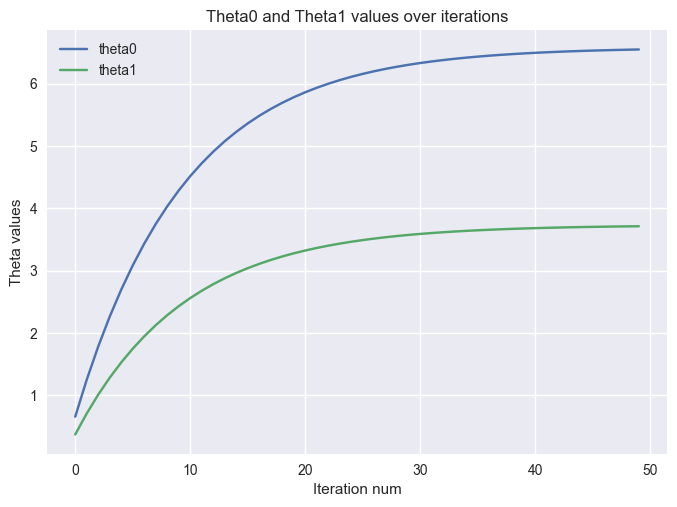

In [19]:
# This code for checking the theta0 and theta1 value over iterations
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0], label='theta0')
plt.plot(theta_list[:,1], label='theta1')
plt.xlabel("Iteration num")
plt.ylabel("Theta values")
plt.title("Theta0 and Theta1 values over iterations")
plt.legend()
plt.show()

[ 2.25039312  5.21340623  5.0474111  ...  6.99951385 10.02726506
  8.16811958]


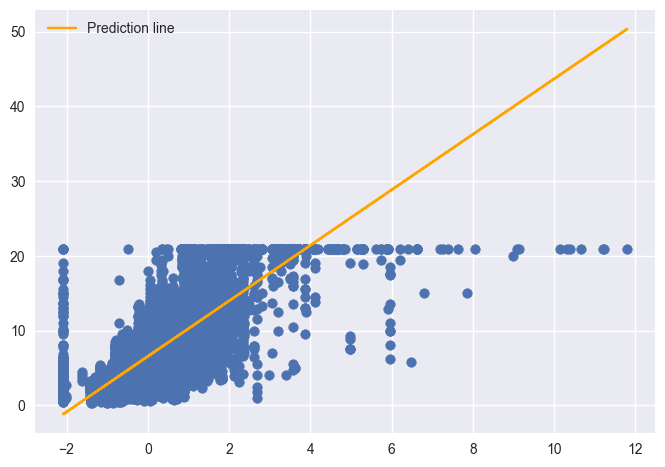

In [20]:
# Final prediction line after 50 iterations
# Best fit line
fig = plt.figure()
y_hat = hypothisis(X, theta)
print(y_hat)
plt.scatter(X, Y)
plt.plot(X, y_hat, color="orange", label="Prediction line")
plt.legend()
plt.show()


In [21]:
# SST = Total sum of squares
# SSR = Residial sum of squares
# formula = R^2 =1- SSR/SST
# SSR = sum((y_hat - y_mean)^2)
# SST = sum((y - y_mean)^2)

def r2_score(Y, Y_hat):
    num = np.sum((Y-Y_hat)**2)
    demon = np.sum((Y-Y.mean())**2)
    score=(1-num/demon)
    return score

In [22]:
r2_score(Y, y_hat)

np.float64(0.593435736283723)

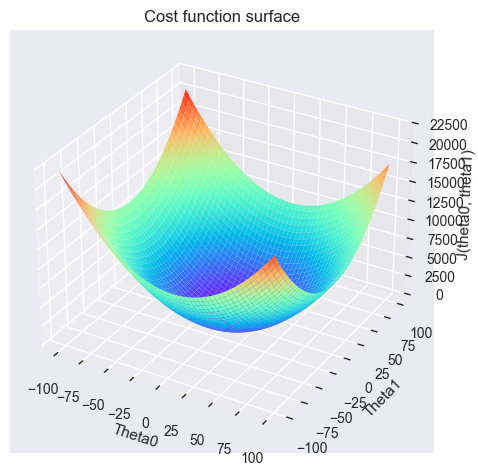

In [25]:
T0 = np.arange(-100, 100, 1)
T1 = np.arange(-100, 100, 1)

T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        Y_hat = T1[i, j]*X + T0[i, j]
        J[i,j] = np.sum((Y-Y_hat)**2)/Y.shape[0]

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
axes.set_xlabel('Theta0')
axes.set_ylabel('Theta1')
axes.set_zlabel('J(theta0, theta1)')
plt.title('Cost function surface')
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression


In [32]:
model = LinearRegression()


In [33]:
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

In [ ]:
model.fit(X,Y) # training the model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
model.intercept_

array([6.58550853])

In [37]:
model.coef_

array([[3.73426622]])

In [38]:
model.score(X,Y)

0.5935005280317714

In [39]:
output = model.predict(X)

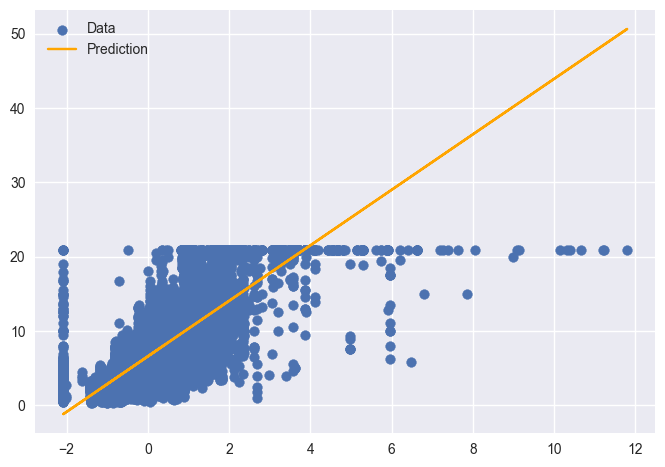

In [41]:
fig = plt.figure()
plt.scatter(X, Y, label="Data")
plt.plot(X, output, color="orange", label="Prediction")
plt.legend()
plt.show()